In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('datasets/crop_part1'):

    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\GiulioGhislandi\AppData\Local\Temp\ipykernel_5340\970707406.py:13: SyntaxWarning: invalid escape sequence '\c'
  for dirname, _, filenames in os.walk('datasets\crop_part1'):


datasets\crop_part1\100_1_0_20170110183726390.jpg.chip.jpg
datasets\crop_part1\100_1_2_20170105174847679.jpg.chip.jpg
datasets\crop_part1\101_1_2_20170105174739309.jpg.chip.jpg
datasets\crop_part1\10_0_0_20161220222308131.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170103200329407.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170103200522151.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170103233459275.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170104013211746.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110215927291.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110220033115.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110220111082.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110220235233.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110220251986.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110220255346.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110220316298.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110220403810.jpg.chip.jpg
datasets\crop_part1\10_0_0_20170110220447314.jpg.chip.jpg
datasets\cr

# Import Libraries

In [13]:
import numpy as np
import pandas as pd

import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import PIL
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [14]:
root_dir = "datasets/crop_part1"

In [15]:
path_arr = []
age_arr = []
gender_arr = []

for file in tqdm(os.listdir(root_dir)):
    labels = file.split("_")
    
    filepath = os.path.join(root_dir, file)
    age = int(labels[0])
    gender = int(labels[1])
    
    path_arr.append(filepath)
    age_arr.append(age)
    gender_arr.append(gender)

100%|██████████| 9777/9777 [00:00<00:00, 142651.39it/s]


In [16]:
df = pd.DataFrame({
    "image_path": path_arr,
    "age": age_arr,
    "gender": gender_arr
})

In [17]:
df.head()

,image_path,age,gender
0,datasets\crop_part1\100_1_0_20170110183726390....,100,1
1,datasets\crop_part1\100_1_2_20170105174847679....,100,1
2,datasets\crop_part1\101_1_2_20170105174739309....,101,1
3,datasets\crop_part1\10_0_0_20161220222308131.j...,10,0
4,datasets\crop_part1\10_0_0_20170103200329407.j...,10,0


In [18]:
df_train, df_valid, df_test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print("Total Size:", df.shape[0])
print("Train Size:", df_train.shape[0])
print("valid Size:", df_valid.shape[0])
print("Test Size:", df_test.shape[0])

Total Size: 9777
Train Size: 5866
valid Size: 1955
Test Size: 1956


# Visualization

### Train

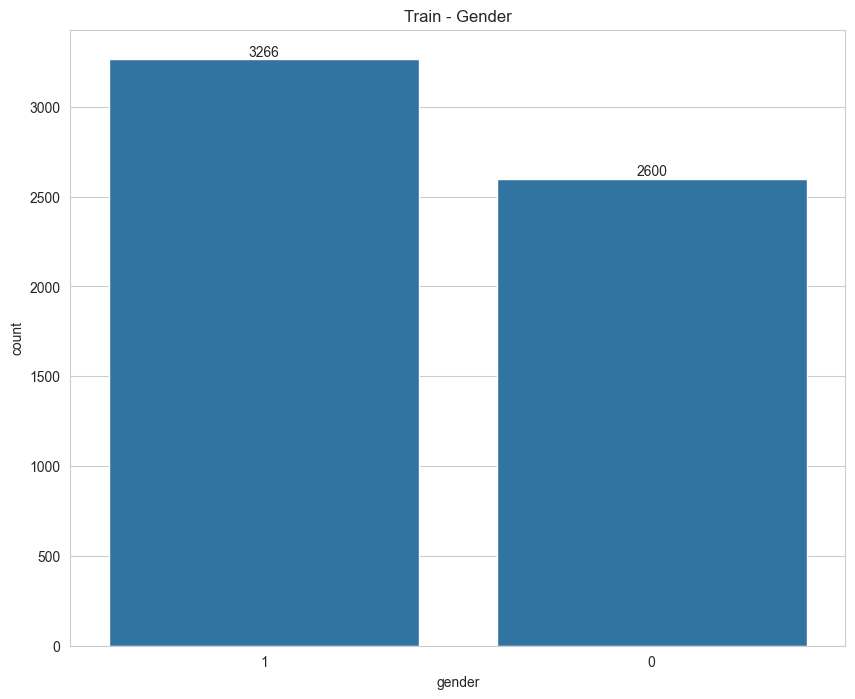

In [19]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_train["gender"].value_counts().index, data=df_train)
ax.set_title("Train - Gender")
for container in ax.containers:
    ax.bar_label(container)

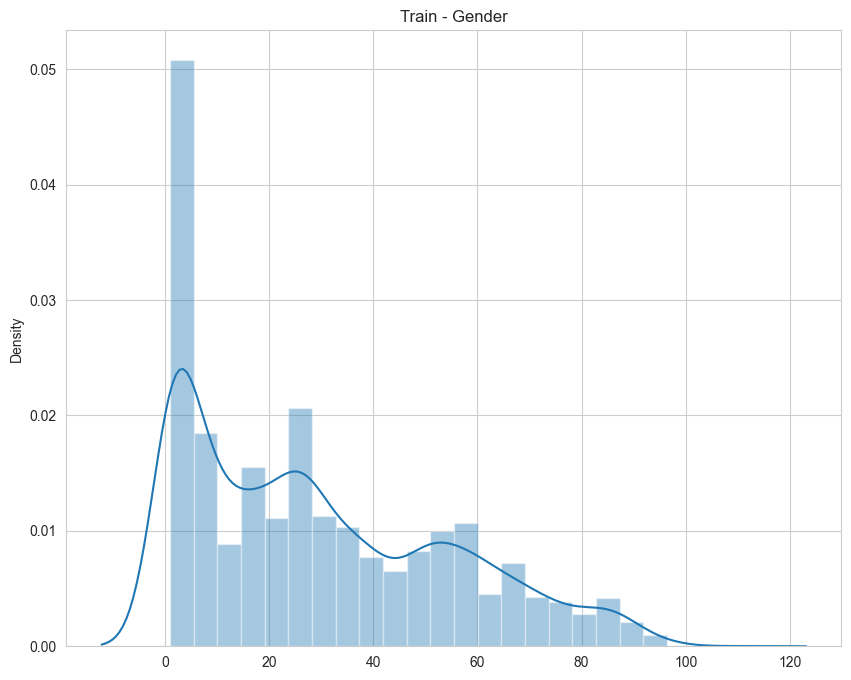

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_train["age"])
ax.set_title("Train - Gender")
plt.show()

### Valid

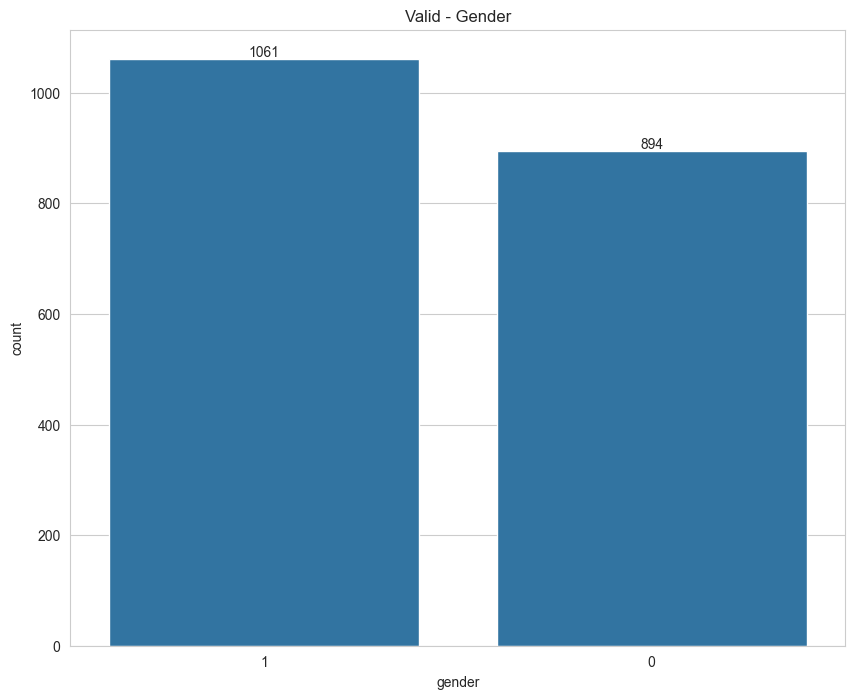

In [21]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_valid["gender"].value_counts().index, data=df_valid)
ax.set_title("Valid - Gender")
for container in ax.containers:
    ax.bar_label(container)

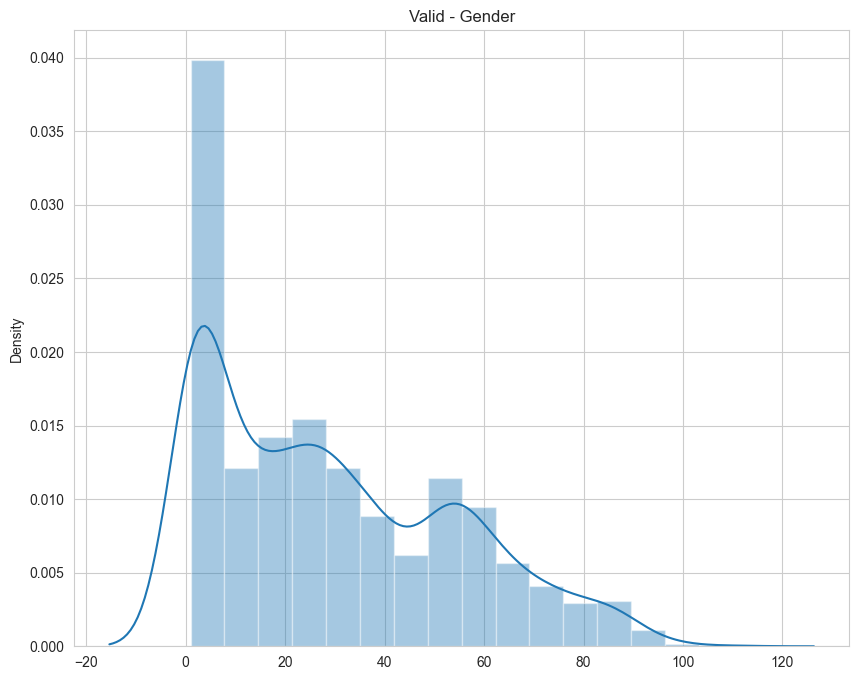

In [22]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_valid["age"])
ax.set_title("Valid - Gender")
plt.show()

### Test

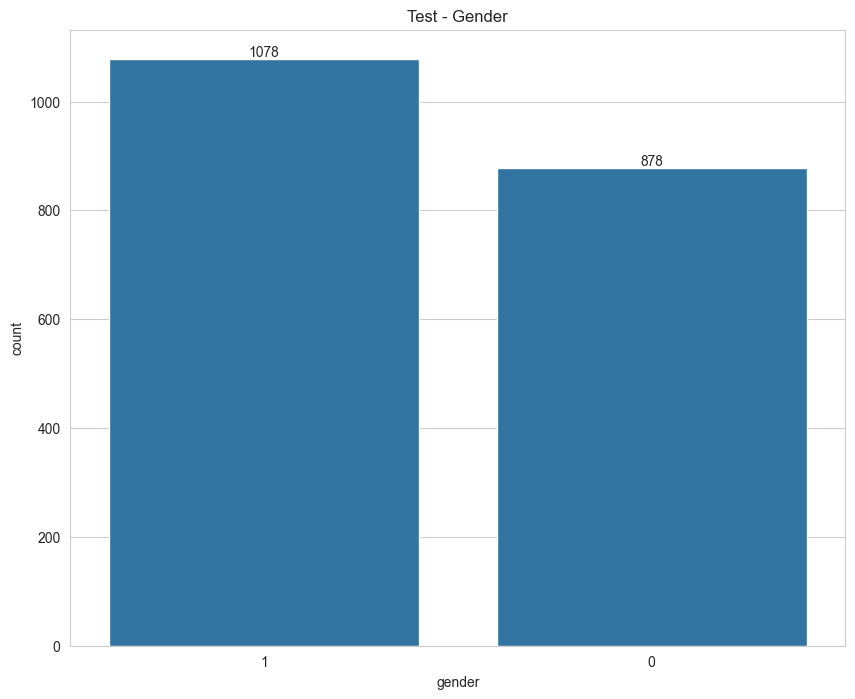

In [23]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_test["gender"].value_counts().index, data=df_test)
ax.set_title("Test - Gender")
for container in ax.containers:
    ax.bar_label(container)

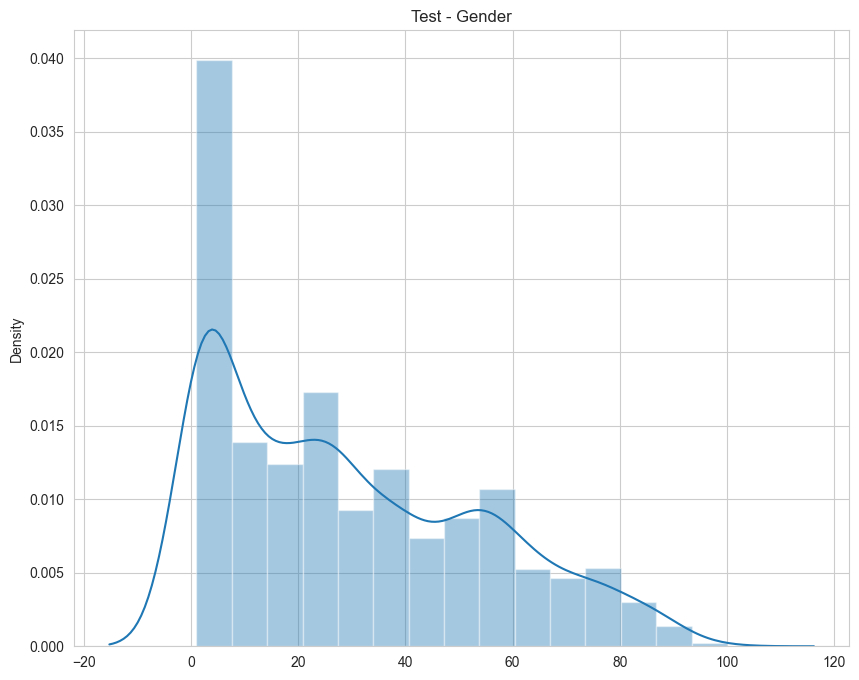

In [24]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_test["age"])
ax.set_title("Test - Gender")
plt.show()

In [25]:
def visualize_df(df: np.ndarray):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            a = np.random.randint(1, len(df), 1)[0]
            img_path = df.loc[a][['image_path']].values[0]
            img_age = df.loc[a][['age']].values[0]
            img_gender = df.loc[a][['gender']].values[0]
            
            image = Image.open(img_path).convert('RGB')
            
            ax.imshow(image)
            ax.set_title(f"Age: {img_age}\nGender: {img_gender}")
            ax.axis('off')
            
        else:
            ax.axis('off')
            
    plt.tight_layout()
    plt.show()

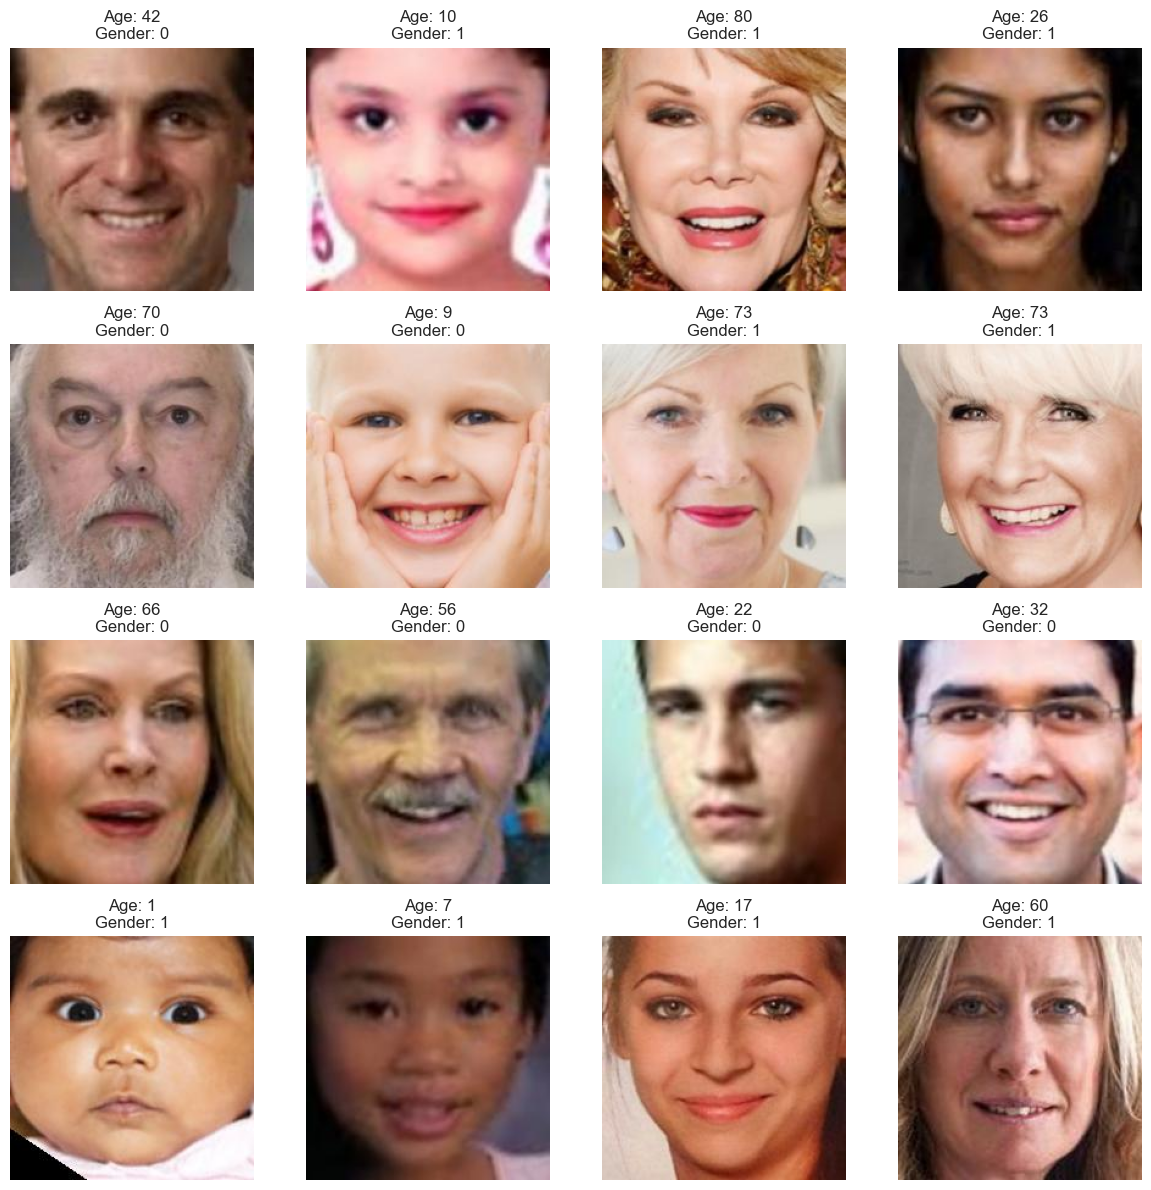

In [26]:
visualize_df(df_train)

In [34]:
train_img_arr = []
train_gender_arr = []
train_age_arr = []

for idx, row in tqdm(df_train.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    train_img_arr.append(img)
    train_gender_arr.append(row['gender'])
    train_age_arr.append(row['age'])
    
train_img_arr = np.array(train_img_arr).reshape(len(train_img_arr), 128, 128, 1)
train_gender_arr = np.array(train_gender_arr)
train_age_arr = np.array(train_age_arr)

5866it [00:16, 351.64it/s]


In [27]:
valid_img_arr = []
valid_gender_arr = []
valid_age_arr = []

for idx, row in tqdm(df_valid.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    valid_img_arr.append(img)
    valid_gender_arr.append(row['gender'])
    valid_age_arr.append(row['age'])
    
valid_img_arr = np.array(valid_img_arr).reshape(len(valid_img_arr), 128, 128, 1)
valid_gender_arr = np.array(valid_gender_arr)
valid_age_arr = np.array(valid_age_arr)

1955it [00:05, 380.90it/s]


In [28]:
test_img_arr = []
test_gender_arr = []
test_age_arr = []

for idx, row in tqdm(df_test.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    test_img_arr.append(img)
    test_gender_arr.append(row['gender'])
    test_age_arr.append(row['age'])
    
test_img_arr = np.array(test_img_arr).reshape(len(test_img_arr), 128, 128, 1)
test_gender_arr = np.array(test_gender_arr)
test_age_arr = np.array(test_age_arr)

1956it [00:05, 371.64it/s]


# Model

In [29]:
inputs = Input(shape=(128, 128, 1))

conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max1)
max2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max2)
max3 = MaxPooling2D(pool_size=(2, 2))(conv3)

flat = Flatten()(max3)

dense1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.3)(dense1)
output_gender = Dense(1, activation='sigmoid')(drop1)

dense2 = Dense(256, activation='relu')(flat)
drop2 = Dropout(0.3)(dense2)
output_age = Dense(1, activation='relu')(drop2)

model = Model(inputs=[inputs], outputs=[output_gender, output_age])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam',
              metrics=['accuracy', 'mae'])

In [30]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 25088)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  6,422,784 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │  6,422,784 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        257 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        257 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,938,754 (49.36 MB)

 Trainable params: 12,938,754 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(x=train_img_arr, y=[train_gender_arr, train_age_arr], batch_size=64, epochs=25, validation_data=(valid_img_arr, [valid_gender_arr, valid_age_arr]))

Epoch 1/25
52/92 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - dense_1_accuracy: 0.5349 - dense_3_mae: 22.6350 - loss: 23.5362

KeyboardInterrupt: 

# Plot the Results

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()

In [ ]:
plt.figure(figsize=(10, 8))

plt.title("Gender Accuracy")

plt.plot(history_df["dense_1_accuracy"])
plt.plot(history_df["val_dense_1_accuracy"])

plt.legend(["train", "valid"])

plt.show()

In [ ]:
plt.figure(figsize=(10, 8))

plt.title("Age MAE")

plt.plot(history_df["dense_3_mae"])
plt.plot(history_df["val_dense_3_mae"])

plt.legend(["train", "valid"])

plt.show()

# Test

In [ ]:
preds = model.predict(test_img_arr, verbose=0)
pred_gender = np.argmax(preds[0], axis=1)
pred_age = [round(pred[0]) for pred in preds[1]]

In [ ]:
df_test["pred_age"] = pred_age
df_test["pred_gender"] = pred_gender

In [ ]:
df_test.head()

In [ ]:
def visualize_results(df: pd.DataFrame):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            a = np.random.randint(1, len(df), 1)[0]
            gender_dict = {0: 'Male', 1: 'Female'}
            img_path = df.loc[a][['image_path']].values[0]
            img_age = df.loc[a][['age']].values[0]
            img_gender = df.loc[a][['gender']].values[0]
            img_pred_age = df.loc[a][['pred_age']].values[0]
            img_pred_gender = df.loc[a][['pred_gender']].values[0]
            
            image = Image.open(img_path).convert('RGB')
            
            ax.imshow(image)
            ax.set_title(f"Pred Age: {img_pred_age}(True:{img_age})\nPred Gender: {gender_dict[img_pred_gender]}(True:{gender_dict[img_gender]})")
            ax.axis('off')
            
        else:
            ax.axis('off')
            
    plt.tight_layout()
    plt.savefig("results_plot.jpg")

In [ ]:
visualize_results(df_test)